In [31]:
import pandas as pd
import numpy as np

#read and parse the .csv features file for A1-turbine normalized data
df = pd.read_csv('Data/A2-bank/bank-additional_normalized.csv', delimiter = '\t')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,1,1,1,1,1,1,1,...,2,999,0,1,-0.3333,-0.4606,-0.6151,-0.6925,0.0246,0
1,39,2,2,2,1,2,1,2,1,1,...,4,999,0,1,0.8750,0.3975,0.2050,0.9138,0.7195,0
2,25,2,1,2,1,1,1,2,2,2,...,1,999,0,1,1.0000,0.7646,-0.2469,0.9624,1.0000,0
3,47,3,1,3,1,1,1,1,3,3,...,1,999,0,1,0.3750,-0.2214,-0.2636,0.6127,0.7558,0
4,32,2,2,3,1,2,1,1,4,4,...,3,999,2,2,-0.0417,0.5573,0.1130,-0.8871,-1.0000,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3090 non-null   int64  
 1   job             3090 non-null   int64  
 2   marital         3090 non-null   int64  
 3   education       3090 non-null   int64  
 4   default         3090 non-null   int64  
 5   housing         3090 non-null   int64  
 6   loan            3090 non-null   int64  
 7   contact         3090 non-null   int64  
 8   month           3090 non-null   int64  
 9   day_of_week     3090 non-null   int64  
 10  duration        3090 non-null   int64  
 11  campaign        3090 non-null   int64  
 12  pdays           3090 non-null   int64  
 13  previous        3090 non-null   int64  
 14  poutcome        3090 non-null   int64  
 15  emp.var.rate    3090 non-null   float64
 16  cons.price.idx  3090 non-null   float64
 17  cons.conf.idx   3090 non-null   f

In [33]:
columns = df.shape[1]

# construct an array for all features input values
inputcolumns = df.columns[0 : 20]
features = df[inputcolumns].values

# construct an array for all features target values
outputcolumn = df.columns[20]
targets = df[outputcolumn].values

print(features.shape)
print(targets.shape)

print(features)

(3090, 20)
(3090,)
[[ 3.000e+01  1.000e+00  1.000e+00 ... -6.151e-01 -6.925e-01  2.460e-02]
 [ 3.900e+01  2.000e+00  2.000e+00 ...  2.050e-01  9.138e-01  7.195e-01]
 [ 2.500e+01  2.000e+00  1.000e+00 ... -2.469e-01  9.624e-01  1.000e+00]
 ...
 [ 2.700e+01  1.100e+01  2.000e+00 ... -6.151e-01 -6.739e-01  2.460e-02]
 [ 5.800e+01  3.000e+00  1.000e+00 ...  2.301e-01  9.642e-01  1.000e+00]
 [ 3.400e+01  6.000e+00  2.000e+00 ... -2.636e-01  5.805e-01  7.558e-01]]


In [34]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.20, random_state= 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2472, 20)
(618, 20)
(2472,)
(618,)


In [35]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train, y_train)
score = reg.score(x_train, y_train)
print(score)

y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)
print(y_pred_test)

# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# print("R2 score: ", r2_score(y_test, y_pred_test))
# print("MSE: ", mean_squared_error(y_test, y_pred_test))
# print("MAE: ", mean_absolute_error(y_test, y_pred_test))

# print("R2 score: ", r2_score(y_train, y_pred_train))
# print("MSE: ", mean_squared_error(y_train, y_pred_train))
# print("MAE: ", mean_absolute_error(y_train, y_pred_train))

0.3583825811069786
[ 6.28253452e-02  4.43966360e-01  4.35128596e-02  1.13037058e-01
  5.16001793e-01 -1.66746724e-02 -1.83000184e-03  1.08477324e-02
  3.17702918e-01 -7.49428368e-02 -6.09151823e-04  1.24902150e-01
  7.52472703e-01  7.95127626e-03  1.05310218e-01 -1.19405342e-02
  4.06948180e-01 -1.07708792e-01  9.57223855e-02  2.92606514e-02
  1.43585408e-01 -6.24490468e-02  1.85918342e-02  2.01885055e-01
  5.08033330e-02  1.86798675e-02  2.55819591e-01  2.80282700e-01
 -5.77187215e-02 -2.34244985e-02 -4.07796750e-02  7.11007787e-03
 -7.54566486e-02 -7.09895238e-02 -3.24812994e-03  6.66126639e-02
 -6.30150506e-04  1.86214319e-01  2.44187180e-01 -6.63630150e-03
 -2.21114109e-02  3.72570190e-01  1.13305489e-01  5.03345832e-02
  3.79793705e-01  1.14212367e-01  1.30860404e-02  3.53869135e-02
  6.38297669e-02  3.08568871e-01  1.11151557e-02 -2.84918435e-02
  2.12201236e-01  2.82194809e-02 -5.34038742e-03  9.54923299e-02
 -6.99667721e-03  3.53212234e-01  7.43409645e-01 -2.87501931e-02
 -1.22

In [36]:
# binarize y_pred_test
y_pred_test_binarized = (y_pred_test > 0.5).astype(np.int_)
# print(y_pred_test_binarized)
# print(y_pred_test)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 

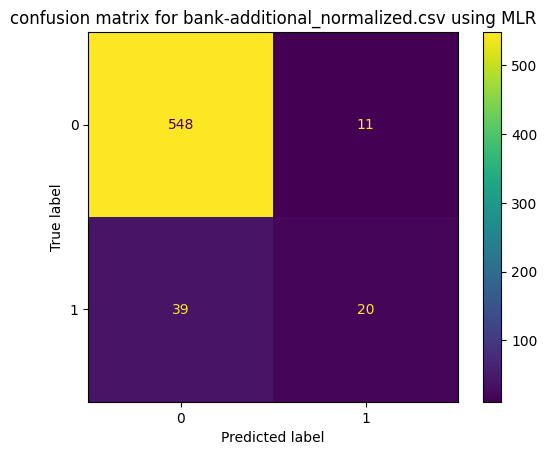

In [37]:
import matplotlib.pyplot as plt
from sklearn import metrics

actual = y_test
predicted = y_pred_test_binarized

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.title("confusion matrix for bank-additional_normalized.csv using MLR")
plt.show()